In [ ]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                    n_redundant=0, n_classes=2,
                                    random_state=7816)


n_samples are number of rows
n_features are number of columns
n_redundant refers to the number of redundant features (features that are linearly dependent with one of the informative features) to generate. In this case, it is set to 0, meaning no redundant features will be generated.
n_classes refers to the number of classes (or labels) to generate. In this case, it is set to 2, meaning two classes will be generated.
random_state refers to the seed used by the random number generator to ensure reproducibility. In this case, it is set to 7816, meaning the same dataset will be generated every time this code is run with the same parameters.

In [ ]:
X.shape, y.shape

((100, 2), (100,))

## Visualizing Dataset

Text(0, 0.5, 'y values')

<Figure size 640x480 with 0 Axes>

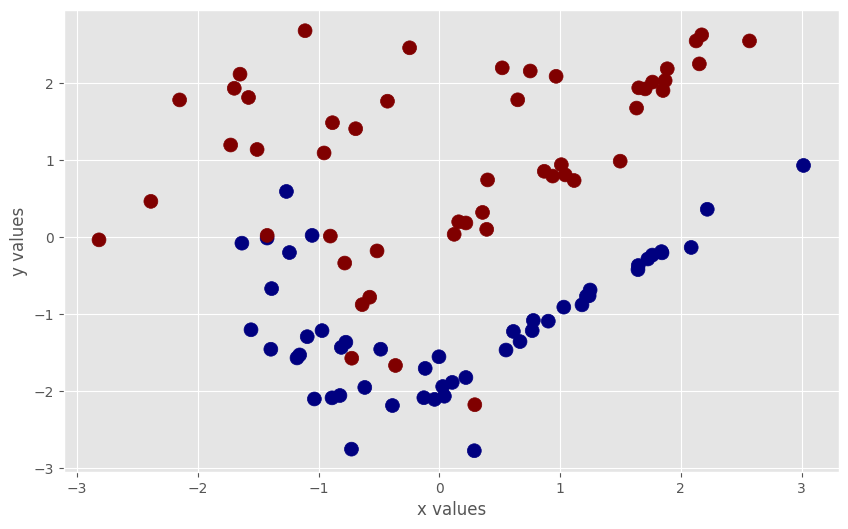

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

import matplotlib.pyplot as plt: This line imports the pyplot module from the matplotlib library. The pyplot module is a collection of command style functions that make matplotlib work like MATLAB.

plt.style.use('ggplot'): This line sets the plotting style to 'ggplot'. This is a popular style for statistical graphics, and it is part of the ggplot package in R.

plt.set_cmap('jet'): This line sets the colormap to 'jet'. The colormap is used to map the data values to colors.

plt.figure(figsize=(10, 6)): This line creates a new figure with a specified size.

plt.scatter(X[:, 0], X[:, 1], c=y, s=100): This line generates a scatter plot of the first two features (X[:, 0] and X[:, 1]) of the dataset. The c parameter is used to set the color of the points based on the values of y. The s parameter is used to set the size of the points.

plt.xlabel('x values'): This line adds a label to the x-axis of the plot.

plt.ylabel('y values'): This line adds a label to the y-axis of the plot.

plt.show(): This line displays the plot.

The purpose of this code is to visualize the generated dataset using a scatter plot. The x-axis represents the first feature, the y-axis represents the second feature, and the color of the points represents the class they belong to.

## Preprocessing dataset


In [ ]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 - 1

In [ ]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size=0.2, random_state=42
)

import numpy as np: This line imports the numpy library and assigns it the alias np.

X = X.astype(np.float32): This line changes the data type of the X array from its current type to np.float32. This is done to ensure that the data is in the correct format for machine learning algorithms.

y = y * 2 - 1: This line scales the y array to the range of -1 and 1. This is done to ensure that the data is in the correct format for machine learning algorithms.

from sklearn import model_selection as ms: This line imports the model_selection module from the sklearn library and assigns it the alias ms.

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42): This line splits the X and y arrays into training and testing sets. The test_size parameter is used to specify the fraction of the data to be used for testing (in this case, 20%). The random_state parameter is used to ensure reproducibility.

The purpose of this code is to prepare the data for machine learning. The X and y arrays are converted to the correct data format, and the data is split into training and testing sets. This is a common preprocessing step in machine learning.



## Building the SVM

In [ ]:
import cv2
svm = cv2.ml.SVM_create()

In [ ]:
svm.setKernel(cv2.ml.SVM_LINEAR)

In [ ]:

svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train);

In [ ]:
_, y_pred = svm.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

import cv2: This line imports the cv2 library, which is a computer vision library for Python.

svm = cv2.ml.SVM_create(): This line creates an instance of the cv2.ml.SVM_create() class, which is a support vector machine (SVM) classifier in the cv2 library.

svm.setKernel(cv2.ml.SVM_LINEAR): This line sets the kernel of the SVM to linear. A kernel is a function that transforms the input data into a higher-dimensional space to make it easier to separate the classes.

svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train): This line trains the SVM using the training data (X_train and y_train). The cv2.ml.ROW_SAMPLE parameter is used to specify that each row of the X_train array represents a sample.

_, y_pred = svm.predict(X_test): This line predicts the class labels for the test data (X_test) using the trained SVM. The predicted labels are stored in the y_pred variable.

from sklearn import metrics: This line imports the metrics module from the sklearn library.

metrics.accuracy_score(y_test, y_pred): This line calculates the accuracy of the SVM by comparing the predicted labels (y_pred) with the true labels (y_test).

The purpose of this code is to train an SVM using the cv2 library and evaluate its accuracy using the sklearn library. The SVM is trained using the training data, and then it is used to predict the class labels for the test data. The accuracy of the SVM is calculated by comparing the predicted labels with the true labels.

## Visualizing the Decision Boundary

In [ ]:
def plot_decision_boundary(svm, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)


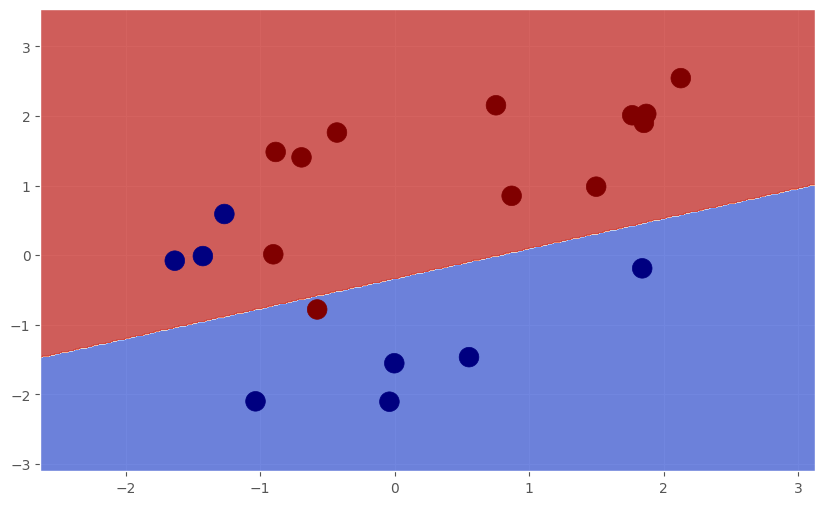

In [ ]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(svm, X_test, y_test)

def plot_decision_boundary(svm, X_test, y_test):: This line defines a function called plot_decision_boundary that takes in three parameters: svm (a trained SVM classifier), X_test (the test data), and y_test (the true labels for the test data).

h = 0.02: This line sets the step size in the mesh that will be used to plot the decision boundary.

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1: This line sets the minimum and maximum values for the x-axis of the plot. The X_test[:, 0].min() and X_test[:, 0].max() expressions return the minimum and maximum values of the first feature in the test data, and the - 1 and + 1 expressions add a buffer of 1 to the minimum and maximum values.

y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1: This line sets the minimum and maximum values for the y-axis of the plot. The X_test[:, 1].min() and X_test[:, 1].max() expressions return the minimum and maximum values of the second feature in the test data, and the - 1 and + 1 expressions add a buffer of 1 to the minimum and maximum values.

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)): This line creates a mesh of points that will be used to plot the decision boundary.

X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]: This line creates a new array called X_hypo that contains the x- and y-coordinates of the mesh points.

_, zz = svm.predict(X_hypo): This line uses the trained SVM to predict the class labels for the mesh points. The predicted labels are stored in the zz variable.

zz = zz.reshape(xx.shape): This line reshapes the zz array back to the original shape of the mesh.

plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8): This line plots the decision boundary using the contourf function.

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200): This line plots the test data points using the scatter function. The x-coordinates of the points are stored in X_test[:, 0], the y-coordinates are stored in X_test[:, 1], and the true labels are stored in y_test.

Overall, this function plots the decision boundary of a trained SVM classifier using a mesh of points. The decision boundary is the line (or hyperplane) that separates the two classes in the feature space. The function also plots the test data points using different colors to represent the true class labels.